In [8]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from sklearn.model_selection import train_test_split
from torch.utils.data import Dataset, DataLoader

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt

import pandas as pd

In [9]:
# Define transformations to apply to the data
transform = transforms.ToTensor()

# Load the MNIST dataset
train_dataset = datasets.MNIST(root='./data', train=True, transform=transform, download=True)
test_dataset = datasets.MNIST(root='./data', train=False, transform=transform, download=True)

In [10]:
torch.manual_seed(4)
train_loader = DataLoader(train_dataset, batch_size=50, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=100, shuffle=False)

In [11]:
class ShonkhaModel(nn.Module):
  def __init__(self, input, hidden_layer1, hidden_layer2, output):
        super(ShonkhaModel, self).__init__()
        self.fc1 = nn.Linear(input, hidden_layer1)
        self.fc2 = nn.Linear(hidden_layer1, hidden_layer2)
        self.out = nn.Linear(hidden_layer2, output)

  def forward(self, x):
      x = F.softmax(self.fc1(x), dim=1)
      x = F.softmax(self.fc2(x), dim=1)
      x = F.softmax(self.out(x), dim=1)
      return x

In [12]:
from sklearn.metrics import accuracy_score, precision_recall_fscore_support
import pandas as pd
from IPython.display import display

shonkhaObject = ShonkhaModel(784, 784//4, 784//8, 10).to(torch.device('cuda'))

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.NAdam(shonkhaObject.parameters(), lr=0.01)

losses = []
accuracies = []
precisions_micro = []
recalls_micro = []
f1_scores_micro = []
precisions_macro = []
recalls_macro = []
f1_scores_macro = []
precisions_weighted = []
recalls_weighted = []
f1_scores_weighted = []

for i in range(20):
  curr_loss = 0.0
  y_true = []
  y_pred = []

  for j, data in enumerate(train_loader):
    input, output = data[0].to(torch.device('cuda')), data[1].to(torch.device('cuda'))
    input = input.reshape(50, -1)

    optimizer.zero_grad()

    pred_out = shonkhaObject.forward(input)
    loss = criterion(pred_out, output)

    loss.backward()
    optimizer.step()

    curr_loss += loss.item()
    y_true += output.tolist()
    y_pred += torch.argmax(pred_out, dim=1).tolist()

  loss_avg = curr_loss / len(train_loader)
  losses.append(loss_avg)

  acc = accuracy_score(y_true, y_pred)
  accuracies.append(acc*100)

  precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(y_true, y_pred, average='micro', zero_division=1)
  precisions_micro.append(precision_micro)
  recalls_micro.append(recall_micro)
  f1_scores_micro.append(f1_micro)

  precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_true, y_pred, average='macro', zero_division=1)
  precisions_macro.append(precision_macro)
  recalls_macro.append(recall_macro)
  f1_scores_macro.append(f1_macro)

  precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted', zero_division=1)
  precisions_weighted.append(precision_weighted)
  recalls_weighted.append(recall_weighted)
  f1_scores_weighted.append(f1_weighted)
  print(f'epoch: {i:2}  loss: {loss_avg}')



perf_metrics = {
    'loss': losses,
    'accuracy': accuracies,
    'precision_micro': precisions_micro,
    'recall_micro': recalls_micro,
    'f1_micro': f1_scores_micro,
    'precision_macro': precisions_macro,
    'recall_macro': recalls_macro,
    'f1_macro': f1_scores_macro,
    'precision_weighted': precisions_weighted,
    'recall_weighted': recalls_weighted,
    'f1_weighted': f1_scores_weighted
}

perf_metrics_df = pd.DataFrame(perf_metrics)
display(perf_metrics_df)




epoch:  0  loss: 1.7896734617153804
epoch:  1  loss: 1.5836117085814476
epoch:  2  loss: 1.565218727986018
epoch:  3  loss: 1.5577450918157896
epoch:  4  loss: 1.5581305694580079
epoch:  5  loss: 1.5554171317815781
epoch:  6  loss: 1.5536490434408188
epoch:  7  loss: 1.551723353266716
epoch:  8  loss: 1.549396420419216
epoch:  9  loss: 1.5466203985611597
epoch: 10  loss: 1.5522823895017306
epoch: 11  loss: 1.5488002429405847
epoch: 12  loss: 1.5473155574997266
epoch: 13  loss: 1.5454508244991303
epoch: 14  loss: 1.542898369928201
epoch: 15  loss: 1.546383292078972
epoch: 16  loss: 1.544390830496947
epoch: 17  loss: 1.5454422925909361
epoch: 18  loss: 1.5432121246059736
epoch: 19  loss: 1.545466067393621


,loss,accuracy,precision_micro,recall_micro,f1_micro,precision_macro,recall_macro,f1_macro,precision_weighted,recall_weighted,f1_weighted
0,1.789673,70.013333,0.700133,0.700133,0.700133,0.743578,0.689683,0.648100,0.740757,0.700133,0.655398
1,1.583612,87.985000,0.879850,0.879850,0.879850,0.877573,0.878003,0.877518,0.879115,0.879850,0.879216
2,1.565219,89.635000,0.896350,0.896350,0.896350,0.895229,0.895247,0.895167,0.896405,0.896350,0.896307
3,1.557745,90.358333,0.903583,0.903583,0.903583,0.902867,0.902856,0.902694,0.904019,0.903583,0.903628
4,1.558131,90.308333,0.903083,0.903083,0.903083,0.902497,0.902486,0.902134,0.903483,0.903083,0.902919
5,1.555417,90.563333,0.905633,0.905633,0.905633,0.904959,0.904908,0.904573,0.905981,0.905633,0.905452
6,1.553649,90.735000,0.907350,0.907350,0.907350,0.906764,0.906730,0.906309,0.907708,0.907350,0.907096
7,1.551723,90.938333,0.909383,0.909383,0.909383,0.908641,0.908601,0.908472,0.909335,0.909383,0.909212
8,1.549396,91.173333,0.911733,0.911733,0.911733,0.911190,0.910946,0.910790,0.911964,0.911733,0.911572
9,1.546620,91.451667,0.914517,0.914517,0.914517,0.913916,0.913735,0.913758,0.914564,0.914517,0.914474


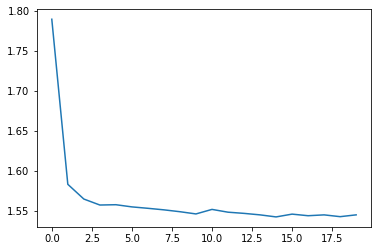

In [13]:
plt.plot(range(20), losses)

In [14]:
correct = 0
total = 0

target_out = []
pred_out = []
with torch.no_grad():
    for (i, data) in enumerate(test_loader):
        input, output = data[0].to(torch.device('cuda')), data[1].to(torch.device('cuda'))
        # Predict the class of the image
        input = input.reshape(100, -1)
        outputs = shonkhaObject.forward(input)
        _, predicted = torch.max(outputs.data, 1)

        pred_out += predicted.tolist()
        target_out += output.tolist()


loss_avg = curr_loss / len(train_loader)

acc = accuracy_score(y_true, y_pred)

precision_micro, recall_micro, f1_micro, _ = precision_recall_fscore_support(y_true, y_pred, average='micro', zero_division=1)


precision_macro, recall_macro, f1_macro, _ = precision_recall_fscore_support(y_true, y_pred, average='macro', zero_division=1)


precision_weighted, recall_weighted, f1_weighted, _ = precision_recall_fscore_support(y_true, y_pred, average='weighted', zero_division=1)


perf_metrics = {
    'loss': [loss_avg],
    'accuracy': [acc*100],
    'precision_micro': [precision_micro*100],
    'recall_micro': [recall_micro*100],
    'f1_micro': [f1_micro*100],
    'precision_macro': [precision_macro*100],
    'recall_macro': [recall_macro*100],
    'f1_macro': [f1_macro*100],
    'precision_weighted': [precision_weighted*100],
    'recall_weighted': [recall_weighted*100],
    'f1_weighted': [f1_weighted*100]
}

perf_metrics_df = pd.DataFrame(perf_metrics)
display(perf_metrics_df)


,loss,accuracy,precision_micro,recall_micro,f1_micro,precision_macro,recall_macro,f1_macro,precision_weighted,recall_weighted,f1_weighted
0,1.545466,91.563333,91.563333,91.563333,91.563333,91.510056,91.482935,91.487287,91.572878,91.563333,91.559094
